### A. 데이터 전처리 - 데이터 읽어오기

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# CSV 파일 경로
csv_path = "archive/NFLX.csv"

# CSV 파일 읽어오기
df = pd.read_csv(csv_path, usecols=range(0, 5))

# DataFrame 출력
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


### B. 데이터 전처리 - 2021년 이후의 종가 데이터 출력하기

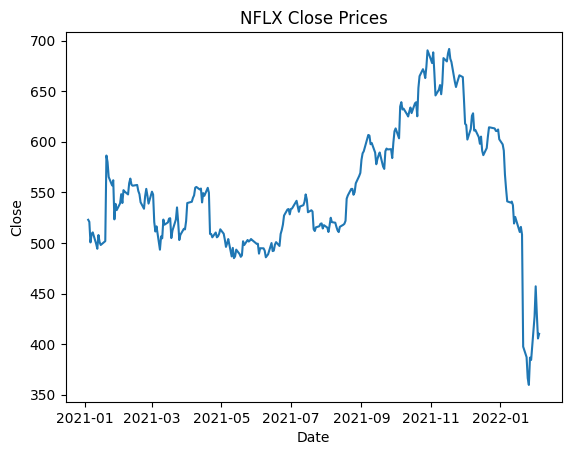

In [23]:
# 날짜 데이터 변환
df["Date"] = pd.to_datetime(df["Date"])

# 2021년 이후의 데이터만 필터링
df_after_2021 = df[df['Date'] >= '2021-01-01']

# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(df_after_2021['Date'], df_after_2021['Close'])

# 그래프 제목 설정
plt.title('NFLX Close Prices')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Close')

# 그래프 표시
plt.show()

### C. 데이터 분석 - 2021년 이후 최고, 최저가 출력하기

In [24]:
# 2021년 이후의 종가 중 가장 높은 종가 출력
max_price = df_after_2021['Close'].max()
print("최고 종가:", max_price)

# 2021년 이후의 종가 중 가장 낮은 종가 출력
min_price = df_after_2021['Close'].min()
print("최저 종가:", min_price)

최고 종가: 691.690002
최저 종가: 359.700012


### D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_9064\3463854986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2021['YearMonth'] = df_after_2021['Date'].dt.to_period("M")
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_9064\3463854986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2021['YearMonth'] = df_after_2021['YearMonth'].dt.to_timestamp()  # Period 타입을 Timestamp 타입으로 변환


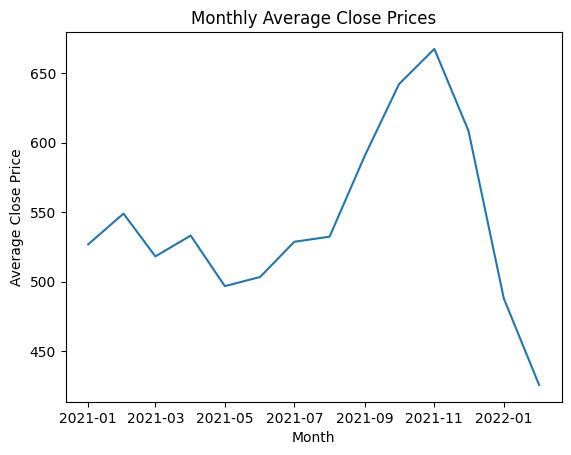

In [20]:
# 년도와 월을 기반으로 그룹화하여 평균 종가 계산
df_after_2021['YearMonth'] = df_after_2021['Date'].dt.to_period("M")
df_after_2021['YearMonth'] = df_after_2021['YearMonth'].dt.to_timestamp()  # Period 타입을 Timestamp 타입으로 변환
monthly_avg_close = df_after_2021.groupby('YearMonth')['Close'].mean()

# 새로운 DataFrame으로 변환
df_monthly_avg_close = pd.DataFrame({
    'YearMonth': monthly_avg_close.index,
     'MonthlyAvgClose': monthly_avg_close.values
    })

# 그래프
plt.plot(
    df_monthly_avg_close['YearMonth'],
    df_monthly_avg_close['MonthlyAvgClose']
    )
plt.title('Monthly Average Close Prices')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.show()

### E. 데이터 시각화 - 2022년 1월 이후 월 별 최고, 최저, 종가 시각화

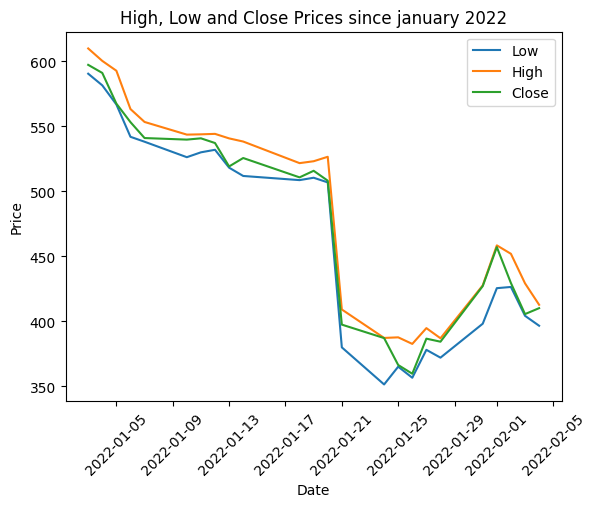

In [21]:
# 2022년 이후 데이터 필터링
df_after_2022 = df[df["Date"] >= "2022-01-01"]

# 그래프 그리기
plt.plot(df_after_2022['Date'], df_after_2022['Low'], label='Low')
plt.plot(df_after_2022['Date'], df_after_2022['High'], label='High')
plt.plot(df_after_2022['Date'], df_after_2022['Close'], label='Close')

# 그래프 제목 설정
plt.title('High, Low and Close Prices since january 2022')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price')

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()